Examine parameter and error distributions of model fits to Baker et al data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from aux import get_seg
from disp import get_line, set_font_size, set_plot, get_spaced_colors, set_color

cc = np.concatenate


FPS = 8.5
DT = 1/FPS
T = np.arange(300)*DT - 10
T_COLS = [f'IT_{it}' for it in range(300)]

SONG_FILE = 'data/simple/p_songs.npy'

In [2]:
tmp = np.load(SONG_FILE, allow_pickle=True)[0]
songs = tmp['songs']
dt = tmp['dt']
fps = tmp['fps']

COLORS = [(.7, .7, .7), 'b', 'r', (1, .5, 0)]

In [3]:
durs = dt*np.array([len(s) for s in songs])
m_cpln = ~(durs == durs.max())

In [4]:
def plot_s(ax, t, s, extent, c, t_bar=1):
    """
    Note: extent: [x_min, x_max, y_min, y_max]
    """
    x_0 = extent[0]
    dx = (extent[1] - extent[0]) / len(s)
    modes = range(4)
    for mode in modes:
        bds = get_seg(s==mode, min_gap=1)[1]
        for istart, iend in bds:
            ax.fill_between([x_0+dx*istart, x_0+dx*iend], 2*[extent[2]], 2*[extent[3]], color=c[mode])
            
    dt = np.mean(np.gradient(t))
    dy_scale = .2*(extent[3]-extent[2])
    ax.fill_between([x_0, x_0+dx/dt*t_bar], 2*[extent[3] + 2*dy_scale], 2*[extent[3] + 3*dy_scale], color='k')
    return ax

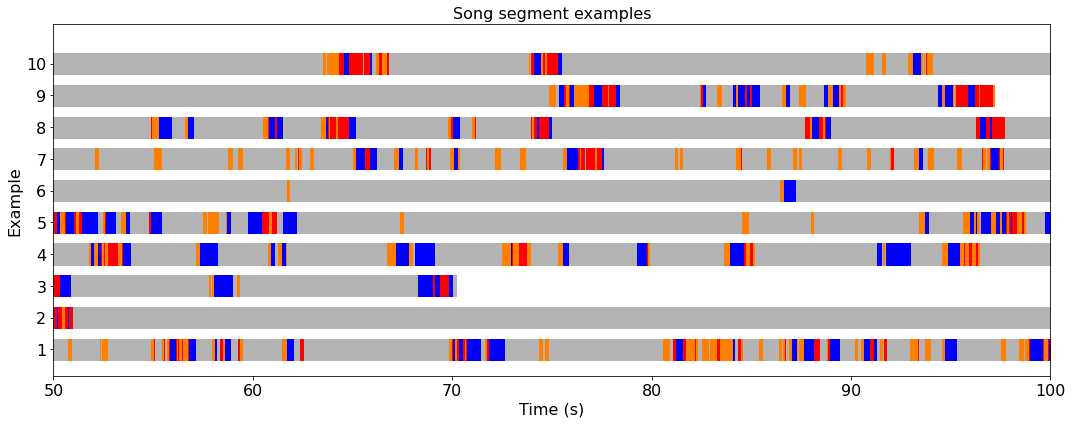

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6), tight_layout=True)

y_ticks = []
for cs, isong in enumerate(range(10)):
    s = songs[isong]
    t = np.arange(len(s))*dt
    plot_s(ax, t, s, extent=[0, len(s)*dt, 1.5*cs, 1.5*cs+1], c=COLORS, t_bar=0)
    y_ticks.append(1.5*cs + .5)

ax.set_xlim(50, 100)
ax.set_yticks(y_ticks)
ax.set_yticklabels(np.arange(len(y_ticks))+1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Example')
ax.set_title('Song segment examples')

set_font_size(ax, 16)

Time till copulation distribution

In [6]:
def plot_hists(x, bins=30, c='k', lw=3, fig=None, axs=None, **kwargs):
    if fig is None and axs is None:
        fig, axs = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)
    cts, bins = np.histogram(x, bins=bins, **kwargs)
    binc = .5*(bins[:-1] + bins[1:])
    axs[0].plot(binc, cts, c=c, lw=lw)
    axs[1].semilogy(binc, cts, c=c, lw=lw)
    axs[2].loglog(binc, cts, c=c, lw=lw)
    
    return fig, axs

Text(11, 17.5, 'Std = 5.25 min')

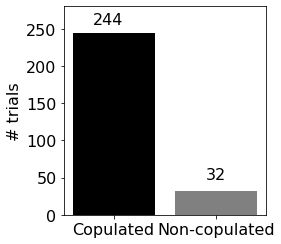

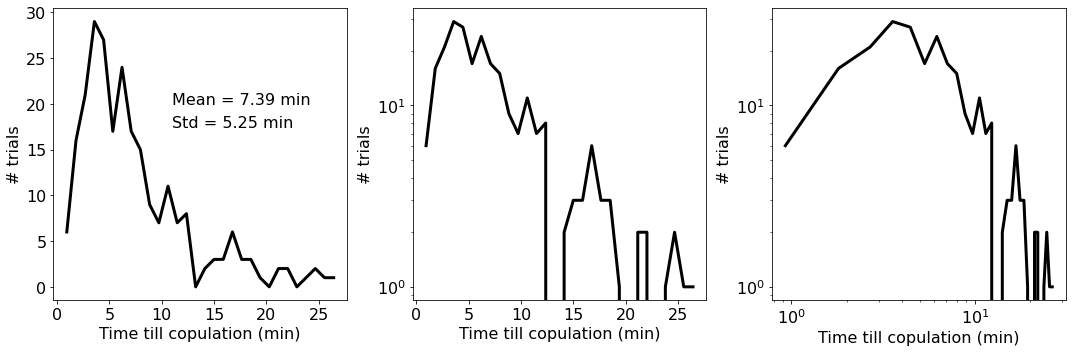

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3.5), tight_layout=True)
n = len(songs)
n_cpln = m_cpln.sum()

ax.bar([0, 1], [n_cpln, n-n_cpln], color=['k', 'gray'], align='center')
ax.set_ylim(0, 280)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Copulated', 'Non-copulated'])
ax.set_ylabel('# trials')
ax.text(-.2, 256, f'{n_cpln}', fontsize=16)
ax.text(.9, 48, f'{n-n_cpln}', fontsize=16)

set_font_size(ax, 16)

t_cpln = durs[durs < durs.max()]

fig, axs = plot_hists(t_cpln/60, bins=30)
for ax in axs:
    ax.set_xlabel('Time till copulation (min)')
    ax.set_ylabel('# trials')
    set_font_size(ax, 16)
axs[0].text(11, 20, f'Mean = {t_cpln.mean()/60:.2f} min', fontsize=16)
axs[0].text(11, 17.5, f'Std = {t_cpln.std()/60:.2f} min', fontsize=16)

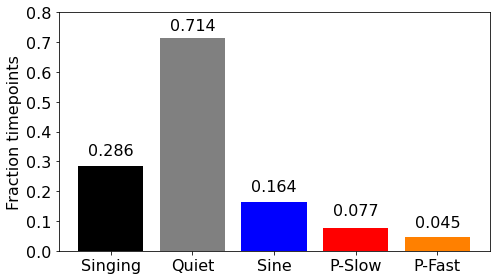

In [8]:
songs_cc = cc(songs)
frc_sng = np.mean(songs_cc > 0)
frc_qui = np.mean(songs_cc == 0)
frc_sin = np.mean(songs_cc == 1)
frc_psl = np.mean(songs_cc == 2)
frc_pfs = np.mean(songs_cc == 3)

fig, ax = plt.subplots(1, 1, figsize=(7, 4), tight_layout=True)
ax.bar(range(5), [frc_sng, frc_qui, frc_sin, frc_psl, frc_pfs], color=['k', 'gray', 'b', 'r', (1, .5, 0)], align='center')
ax.set_ylim(0, .8)
ax.set_xticks(range(5))
ax.set_xticklabels(['Singing', 'Quiet', 'Sine', 'P-Slow', 'P-Fast'])
ax.set_ylabel('Fraction timepoints')
ax.text(0, .32, f'{frc_sng:.3f}', ha='center', fontsize=16)
ax.text(1, .74, f'{frc_qui:.3f}', ha='center', fontsize=16)
ax.text(2, .2, f'{frc_sin:.3f}', ha='center', fontsize=16)
ax.text(3, .12, f'{frc_psl:.3f}', ha='center', fontsize=16)
ax.text(4, .08, f'{frc_pfs:.3f}', ha='center', fontsize=16)
set_font_size(ax, 16)

In [9]:
durs_sng = []
durs_q = []
durs_s = []
durs_p = []

for s in songs:
    bds_sng = get_seg(s > 0, min_gap=2)[1]*dt
    durs_sng.extend(bds_sng[:, 1] - bds_sng[:, 0])
    
    bds_q = get_seg(s == 0, min_gap=2)[1]*dt
    durs_q.extend(bds_q[:, 1] - bds_q[:, 0])
    
    bds_s = get_seg(s == 1, min_gap=2)[1]*dt
    durs_s.extend(bds_s[:, 1] - bds_s[:, 0])
    
    bds_p = get_seg((s == 2) | (s == 3), min_gap=2)[1]*dt
    durs_p.extend(bds_p[:, 1] - bds_p[:, 0])
    
durs_sng = np.array(durs_sng)
durs_q = np.array(durs_q)
durs_s = np.array(durs_s)
durs_p = np.array(durs_p)

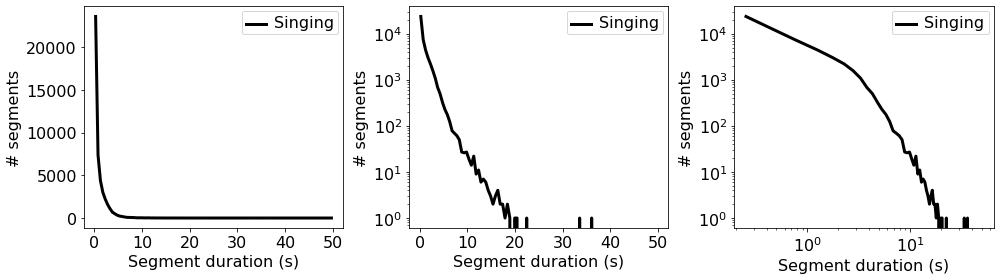

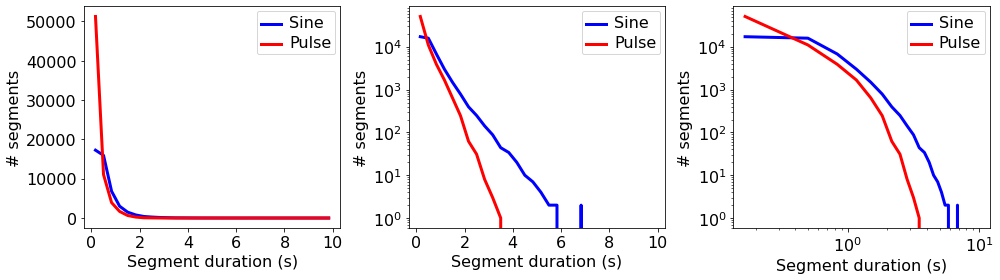

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4), tight_layout=True)
bins = np.linspace(0, 50, 100)
plot_hists(durs_sng, bins=bins, c='k', lw=3, fig=fig, axs=axs)

for ax in axs:
    ax.set_xlabel('Segment duration (s)')
    ax.set_ylabel('# segments')
    ax.legend(['Singing'])
set_font_size(axs, 16)

fig, axs = plt.subplots(1, 3, figsize=(14, 4), tight_layout=True)
bins = np.linspace(0, 10, 31)
plot_hists(durs_s, bins=bins, c='b', lw=3, fig=fig, axs=axs)
plot_hists(durs_p, bins=bins, c='r', lw=3, fig=fig, axs=axs)

for ax in axs:
    ax.set_xlabel('Segment duration (s)')
    ax.set_ylabel('# segments')
    ax.legend(['Sine', 'Pulse'])
set_font_size(axs, 16)

Neural data

In [11]:
df_dyn_param = pd.read_csv('data/simple/baker_dyn_fit_param.csv')

mout = (df_dyn_param['TAU_R'] > 40) | (np.abs(df_dyn_param['X_S']) > 20) | (np.abs(df_dyn_param['X_P']) > 20) | (~df_dyn_param['ROI_USED'])
# mout = (df_dyn_param['TAU_R'] > 40) | (np.abs(df_dyn_param['X_S']) > 20) | (np.abs(df_dyn_param['X_P']) > 20)

91 outliers, 133 valid ROIs


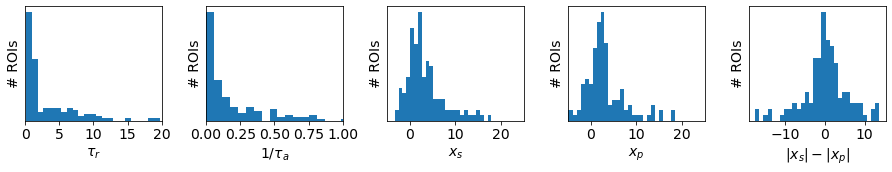

In [12]:
# dynamical fit param distributions
fig, axs = plt.subplots(1, 5, figsize=(12.5, 2.5), tight_layout=True)
axs[0].hist(df_dyn_param['TAU_R'][~mout], bins=30)
axs[0].set_xlim(0, 20)
axs[0].set_xlabel(r'$\tau_r$')
axs[1].hist(1/df_dyn_param['TAU_A'][~mout], bins=30)
axs[1].set_xlim(0, 1)
axs[1].set_xlabel(r'$1/\tau_a$')
axs[2].hist(df_dyn_param['X_S'][~mout], bins=30)
axs[2].set_xlim(-5, 25)
axs[2].set_xlabel(r'$x_s$')
axs[3].hist(df_dyn_param['X_P'][~mout], bins=30)
axs[3].set_xlim(-5, 25)
axs[3].set_xlabel(r'$x_p$')

x_s_x_p = np.array(np.abs(df_dyn_param['X_S']) - np.abs(df_dyn_param['X_P']))

axs[4].hist(x_s_x_p[~mout], bins=30)
axs[4].set_xlabel(r'$|x_s| - |x_p|$')

for ax in axs:
    ax.set_yticks([])
    ax.set_ylabel('# ROIs')
set_font_size(axs, 14)

print(f'{mout.sum()} outliers, {(~mout).sum()} valid ROIs')

Mean TAU_R (s): 4.080007147061995
Mean TAU_R (p): 2.439075102343762
Mean 1/TAU_A (s): 0.21148537424297598
Mean 1/TAU_A (p): 0.17831806941981823


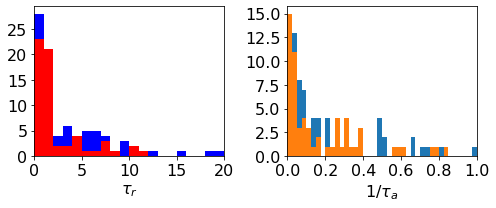

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3), tight_layout=True)

cutoff = 0
ms_pref = (~mout) & (x_s_x_p > cutoff)
mp_pref = (~mout) & (x_s_x_p < -cutoff)

bins_tau_r = np.linspace(0, 20, 21)
axs[0].hist(df_dyn_param['TAU_R'][ms_pref], color='b', bins=bins_tau_r)
axs[0].hist(df_dyn_param['TAU_R'][mp_pref], color='r', bins=bins_tau_r)
axs[0].set_xlim(0, 20)
axs[0].set_xlabel(r'$\tau_r$')

print('Mean TAU_R (s):', np.mean(df_dyn_param['TAU_R'][ms_pref]))
print('Mean TAU_R (p):', np.mean(df_dyn_param['TAU_R'][mp_pref]))

bins_tau_a = np.linspace(0, 1, 41)
axs[1].hist(1/df_dyn_param['TAU_A'][ms_pref], bins=bins_tau_a)
axs[1].hist(1/df_dyn_param['TAU_A'][mp_pref], bins=bins_tau_a)
axs[1].set_xlim(0, 1)
axs[1].set_xlabel(r'$1/\tau_a$')

print('Mean 1/TAU_A (s):', np.mean(1/df_dyn_param['TAU_A'][ms_pref]))
print('Mean 1/TAU_A (p):', np.mean(1/df_dyn_param['TAU_A'][mp_pref]))

set_plot(axs, font_size=16)

Mean bout dur (s): 1.039775614046026
Mean TAU_R (s): 3.3273992167776925
Mean sine dur (s): 0.5873170642584183
Mean pulse dur (s): 0.2945849142124528
Mean S-preferring TAU_R (s): 4.080007147061995
Mean P-preferring TAU_R (s): 2.439075102343762
# total songs: 276
# total timepoints: 4978570


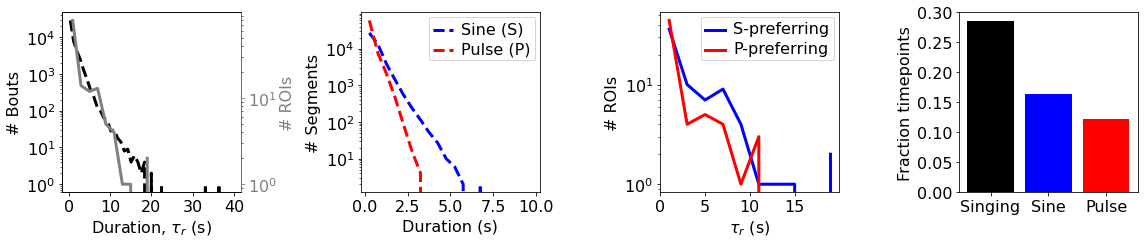

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(16, 3.5), tight_layout=True)

bins_dur_sng = np.linspace(0, 40, 50)
cts_dur_sng = np.histogram(durs_sng, bins=bins_dur_sng)[0]
binc_dur_sng = .5 * (bins_dur_sng[:-1] + bins_dur_sng[1:])
axs[0].semilogy(binc_dur_sng, cts_dur_sng, c='k', lw=3, ls='--')
axs[0].set_xlabel(r'Duration, $\tau_r$ (s)')
axs[0].set_ylabel('# Bouts')

print('Mean bout dur (s):', np.mean(durs_sng))

ax_twin_0 = axs[0].twinx()
bins_tau_r = np.linspace(0, 20, 11)
binc_tau_r = .5 * (bins_tau_r[:-1] + bins_tau_r[1:])
cts_tau_r = np.histogram(df_dyn_param['TAU_R'][~mout], bins=bins_tau_r)[0]
ax_twin_0.semilogy(binc_tau_r, cts_tau_r, c='gray', lw=3)
ax_twin_0.set_ylabel('# ROIs')

set_color(ax_twin_0, 'gray')

print('Mean TAU_R (s):', np.mean(df_dyn_param['TAU_R'][~mout]))

bins_dur_s = np.linspace(0, 10, 21)
cts_dur_s = np.histogram(durs_s, bins=bins_dur_s)[0]
binc_dur_s = .5 * (bins_dur_s[:-1] + bins_dur_s[1:])
axs[1].semilogy(binc_dur_s, cts_dur_s, c='b', lw=3, ls='--')

bins_dur_p = np.linspace(0, 10, 21)
cts_dur_p = np.histogram(durs_p, bins=bins_dur_p)[0]
binc_dur_p = .5 * (bins_dur_p[:-1] + bins_dur_p[1:])

axs[1].semilogy(binc_dur_p, cts_dur_p, c='r', lw=3, ls='--')
axs[1].set_xlabel(r'Duration (s)')
axs[1].set_ylabel('# Segments')
axs[1].legend(['Sine (S)', 'Pulse (P)'])

print('Mean sine dur (s):', np.mean(durs_s))
print('Mean pulse dur (s):', np.mean(durs_p))

cts_tau_r_s = np.histogram(df_dyn_param['TAU_R'][ms_pref], bins=bins_tau_r)[0]
axs[2].semilogy(binc_tau_r, cts_tau_r_s, c='b', lw=3)

cts_tau_r_p = np.histogram(df_dyn_param['TAU_R'][mp_pref], bins=bins_tau_r)[0]
axs[2].semilogy(binc_tau_r, cts_tau_r_p, c='r', lw=3)
axs[2].set_xlim(left=0)
axs[2].set_xlabel(r'$\tau_r$ (s)')
axs[2].set_ylabel('# ROIs')

axs[2].legend(['S-preferring', 'P-preferring'])

print('Mean S-preferring TAU_R (s):', np.mean(df_dyn_param['TAU_R'][ms_pref]))
print('Mean P-preferring TAU_R (s):', np.mean(df_dyn_param['TAU_R'][mp_pref]))

axs[3].bar(range(3), [frc_sng, frc_sin, frc_psl+frc_pfs], color=['k', 'b', 'r'], align='center')
axs[3].set_xticks(range(3))
axs[3].set_xticklabels(['Singing', 'Sine', 'Pulse'])
axs[3].set_ylabel('Fraction timepoints')

print('# total songs:', len(songs))
print('# total timepoints:', len(cc(songs)))

set_plot(axs, font_size=16)
set_plot(ax_twin_0, font_size=16)

fig.savefig('plots/cb_ms/timescales.svg')
fig.savefig('plots/cb_ms/timescales.pdf')